# Problem Statement

Credit Scoring [source](https://colab.research.google.com/drive/1OJSuXY6K2WZWeHt84bLq5Fx4KvqZ8gyc#scrollTo=9vhbjnDIQtp-&line=3&uniqifier=1)

# Importing Libraries and Data Collection

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import joblib
import math
import scipy.stats as stats
%matplotlib inline

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV, RepeatedStratifiedKFold, cross_val_score, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB, GaussianNB

import warnings
warnings.filterwarnings('ignore')

## NOTE

plot_roc_curve        -> RocCurveDisplay


plot_confusion_matrix -> ConfusionMatrixDisplay

In [26]:
import pandas as pd

PATH = "/root/ml_process/data/raw/"

credit_data = pd.read_csv(PATH + "AER_credit_card_data.csv")
credit_data

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


# Data Definition

In [27]:
# Check the DataFrame information
credit_data.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Columns: 12 entries, card to active
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [28]:
# Check the detailed DataFrame information
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


From the information shown above, I comprehend a general 
insight into the `credit_data`.






It has 1319 rows and 12 features, which consist of 9 numerical features, and 3 numerical categorical features.








In [29]:
# Check the features name
credit_data.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')

Features definition:


*   `card`: Acceptance status of credit card application
*   `reports`: Number of major derogatory reports
*   `age`: Age and years plus twelfths of a year
*   `income`: Yearly income (divided by 10,000)
*   `share`: Ratio of monthly credit card expenditure to yearly income
*   `expenditure`: Average monthly credit card expenditure
*   `owner`: Home ownership
*   `selfempl`: Self-employed status, "no" means an employee to a company
*   `dependents`: Number of dependents
*   `months`: Months living at current address
*   `majorcards`: Number of major credit cards held
*   `active`: Number of active credit accounts








# Data Validation

In [30]:
# Check the distribution of numerical features
credit_data.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


Notes on the numerical data.
*  The counts in the entire features are the same value, meaning that `credit_data` has no null value.
* The minimum age recorded is 2 months old, which is consciously impossible to apply for a credit card at that age.
* Applicant(s) who have zero expenditure will also be checked thoroughly later to make sure the data is correctly filled in.





In [31]:
# Check the distribution of categorical features
credit_data.describe(include=['O'])

,card,owner,selfemp
count,1319,1319,1319
unique,2,2,2
top,yes,no,no
freq,1023,738,1228


All the categorical features have the binary value, "yes" and "no".

# Data Splitting

In [32]:
# Import new library to store the new data as a pickle file
import joblib

pkl_folder = "/root/ml_process/data/processed/"

def split_input_output(dataset,
                       target_column,
                       save_file = True,
                       return_file = True):
    """Divide the data into its dependent variables (y-axis) and independent (x-axis) ones,
    and store the result data as a pickle file to smooth the pipeline"""

    
    output_df = dataset[target_column]
    input_df = dataset.drop([target_column],
                            axis = 1)

    
    if save_file:  
        joblib.dump(output_df, pkl_folder + "output_df.pkl")
        joblib.dump(input_df, pkl_folder + "input_df.pkl")
    
    if return_file:
        return output_df, input_df


def split_train_test(x, y, TEST_SIZE):
    """Split the data into the training and test data,
    stratify parameter is activated,
    this function will be reproduced later as the data-splitting process further"""
    
    x_train, x_test,\
        y_train, y_test = train_test_split(x,
                                           y,
                                           test_size=TEST_SIZE,
                                           random_state=46,
                                           stratify=y)

    return x_train, x_test, y_train, y_test

def split_data(data_input, data_output, return_file=False, TEST_SIZE=0.17):
    """Split the data into the training, validation and test data,
    both the validation and test data are split from the training data,
    and store the result data as a pickle file to smooth the pipeline"""

    x_train, x_test, \
        y_train, y_test = split_train_test(
            data_input,
            data_output,
            TEST_SIZE)

    x_train, x_valid, \
        y_train, y_valid = split_train_test(
            x_train,
            y_train,
            TEST_SIZE)
    
    joblib.dump(x_train, pkl_folder + "x_train.pkl")
    joblib.dump(y_train, pkl_folder + "y_train.pkl")
    joblib.dump(x_valid, pkl_folder + "x_valid.pkl")
    joblib.dump(y_valid, pkl_folder + "y_valid.pkl")
    joblib.dump(x_test, pkl_folder + "x_test.pkl")
    joblib.dump(y_test, pkl_folder + "y_test.pkl")

    if return_file:
        return x_train, y_train, \
            x_valid, y_valid, \
            x_test, y_test

In [33]:
# Define the parameter
TARGET = "card"

# Execute the data-splitting functions
output_df, input_df = split_input_output(credit_data,
                                        TARGET, 
                                        save_file = False)

x_train, y_train, x_valid, y_valid, x_test, y_test = split_data(input_df,
                                                               output_df,
                                                               True)

The "credit" feature in `credit_data` is set as the dependent variable (saved as output_df), while the rest features are the independent variables (saved as input_df).

In [34]:
# Recheck the division of the dependent and independent variables from the `credit_data`
print(f'The dependent variable:\n{output_df} \n')
print("-------------------------------------\n")
print(f'The independent variables:\n {input_df}')

The dependent variable:
0       yes
1       yes
2       yes
3       yes
4       yes
       ... 
1314    yes
1315     no
1316    yes
1317    yes
1318    yes
Name: card, Length: 1319, dtype: object 

-------------------------------------

The independent variables:
       reports       age  income     share  expenditure owner selfemp  \
0           0  37.66667  4.5200  0.033270   124.983300   yes      no   
1           0  33.25000  2.4200  0.005217     9.854167    no      no   
2           0  33.66667  4.5000  0.004156    15.000000   yes      no   
3           0  30.50000  2.5400  0.065214   137.869200    no      no   
4           0  32.16667  9.7867  0.067051   546.503300   yes      no   
...       ...       ...     ...       ...          ...   ...     ...   
1314        0  33.58333  4.5660  0.002146     7.333333   yes      no   
1315        5  23.91667  3.1920  0.000376     0.000000    no      no   
1316        0  40.58333  4.6000  0.026513   101.298300   yes      no   
1317        0  

Both the `input_df` and `output_df` are split into three data that will be used for training, validation, and testing the model.

The training data has the majority proportion.

In [35]:
# Inspect the data-splitting result
print(f"input_df shape: {input_df.shape}")
print(f"x_train shape: {x_train.shape}")
print(f"x_valid shape:{x_valid.shape}")
print(f"x_test shape: {x_test.shape}\n")
print("-------------------------------------\n")
print(f"output_df shape: {output_df.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_valid shape: {y_valid.shape}")
print(f"y_test shape: {y_test.shape}")


input_df shape: (1319, 11)
x_train shape: (908, 11)
x_valid shape:(186, 11)
x_test shape: (225, 11)

-------------------------------------

output_df shape: (1319,)
y_train shape: (908,)
y_valid shape: (186,)
y_test shape: (225,)


The stratified splitting method applies to the `output_df` to keep the value proportion approximately the same.

In [36]:
# Recheck the data stratification
print(f"y_train value proportion\n{y_train.value_counts(normalize = True)}")
print("-------------------------------------\n")
print(f"y_valid value proportion\n{y_valid.value_counts(normalize = True)}")
print("-------------------------------------\n")
print(f"y_test value proportion\n{y_test.value_counts(normalize = True)}")

y_train value proportion
yes    0.77533
no     0.22467
Name: card, dtype: float64
-------------------------------------

y_valid value proportion
yes    0.774194
no     0.225806
Name: card, dtype: float64
-------------------------------------

y_test value proportion
yes    0.777778
no     0.222222
Name: card, dtype: float64


# Exploratory Data Analysis (EDA)

## Inspecting the data distribution.

The EDA works are applied only for the training data.

In [37]:
# Concatenate the x_train and y_train for EDA.
EDA_df = pd.concat([x_train, y_train], axis=1).reset_index(drop=True)
joblib.dump(EDA_df, pkl_folder + "EDA_df.pkl")

# Separate the numerical and categorical data types
numerical_columns = EDA_df._get_numeric_data().columns
categorical_columns = (EDA_df.drop(numerical_columns, axis=1)).columns.values.tolist()

In [38]:
# Create the function for data visualization.
def draw_histograms(EDA_df, features, n_rows, n_cols, bins):
    """A function to visualize the multiple graphs of the features
    for an introductory observation to the dataset"""
    fig = plt.figure()
    for i, var_name in enumerate(features):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        EDA_df[var_name].hist(bins = bins, ax=ax, color = 'green', figsize = (50, 50))
        ax.set_title(var_name, fontsize = 50)
        ax.tick_params(labelsize = 40, grid_alpha = 0.7)
    fig.tight_layout() 
    plt.show()

### Numerical Data Distribution.

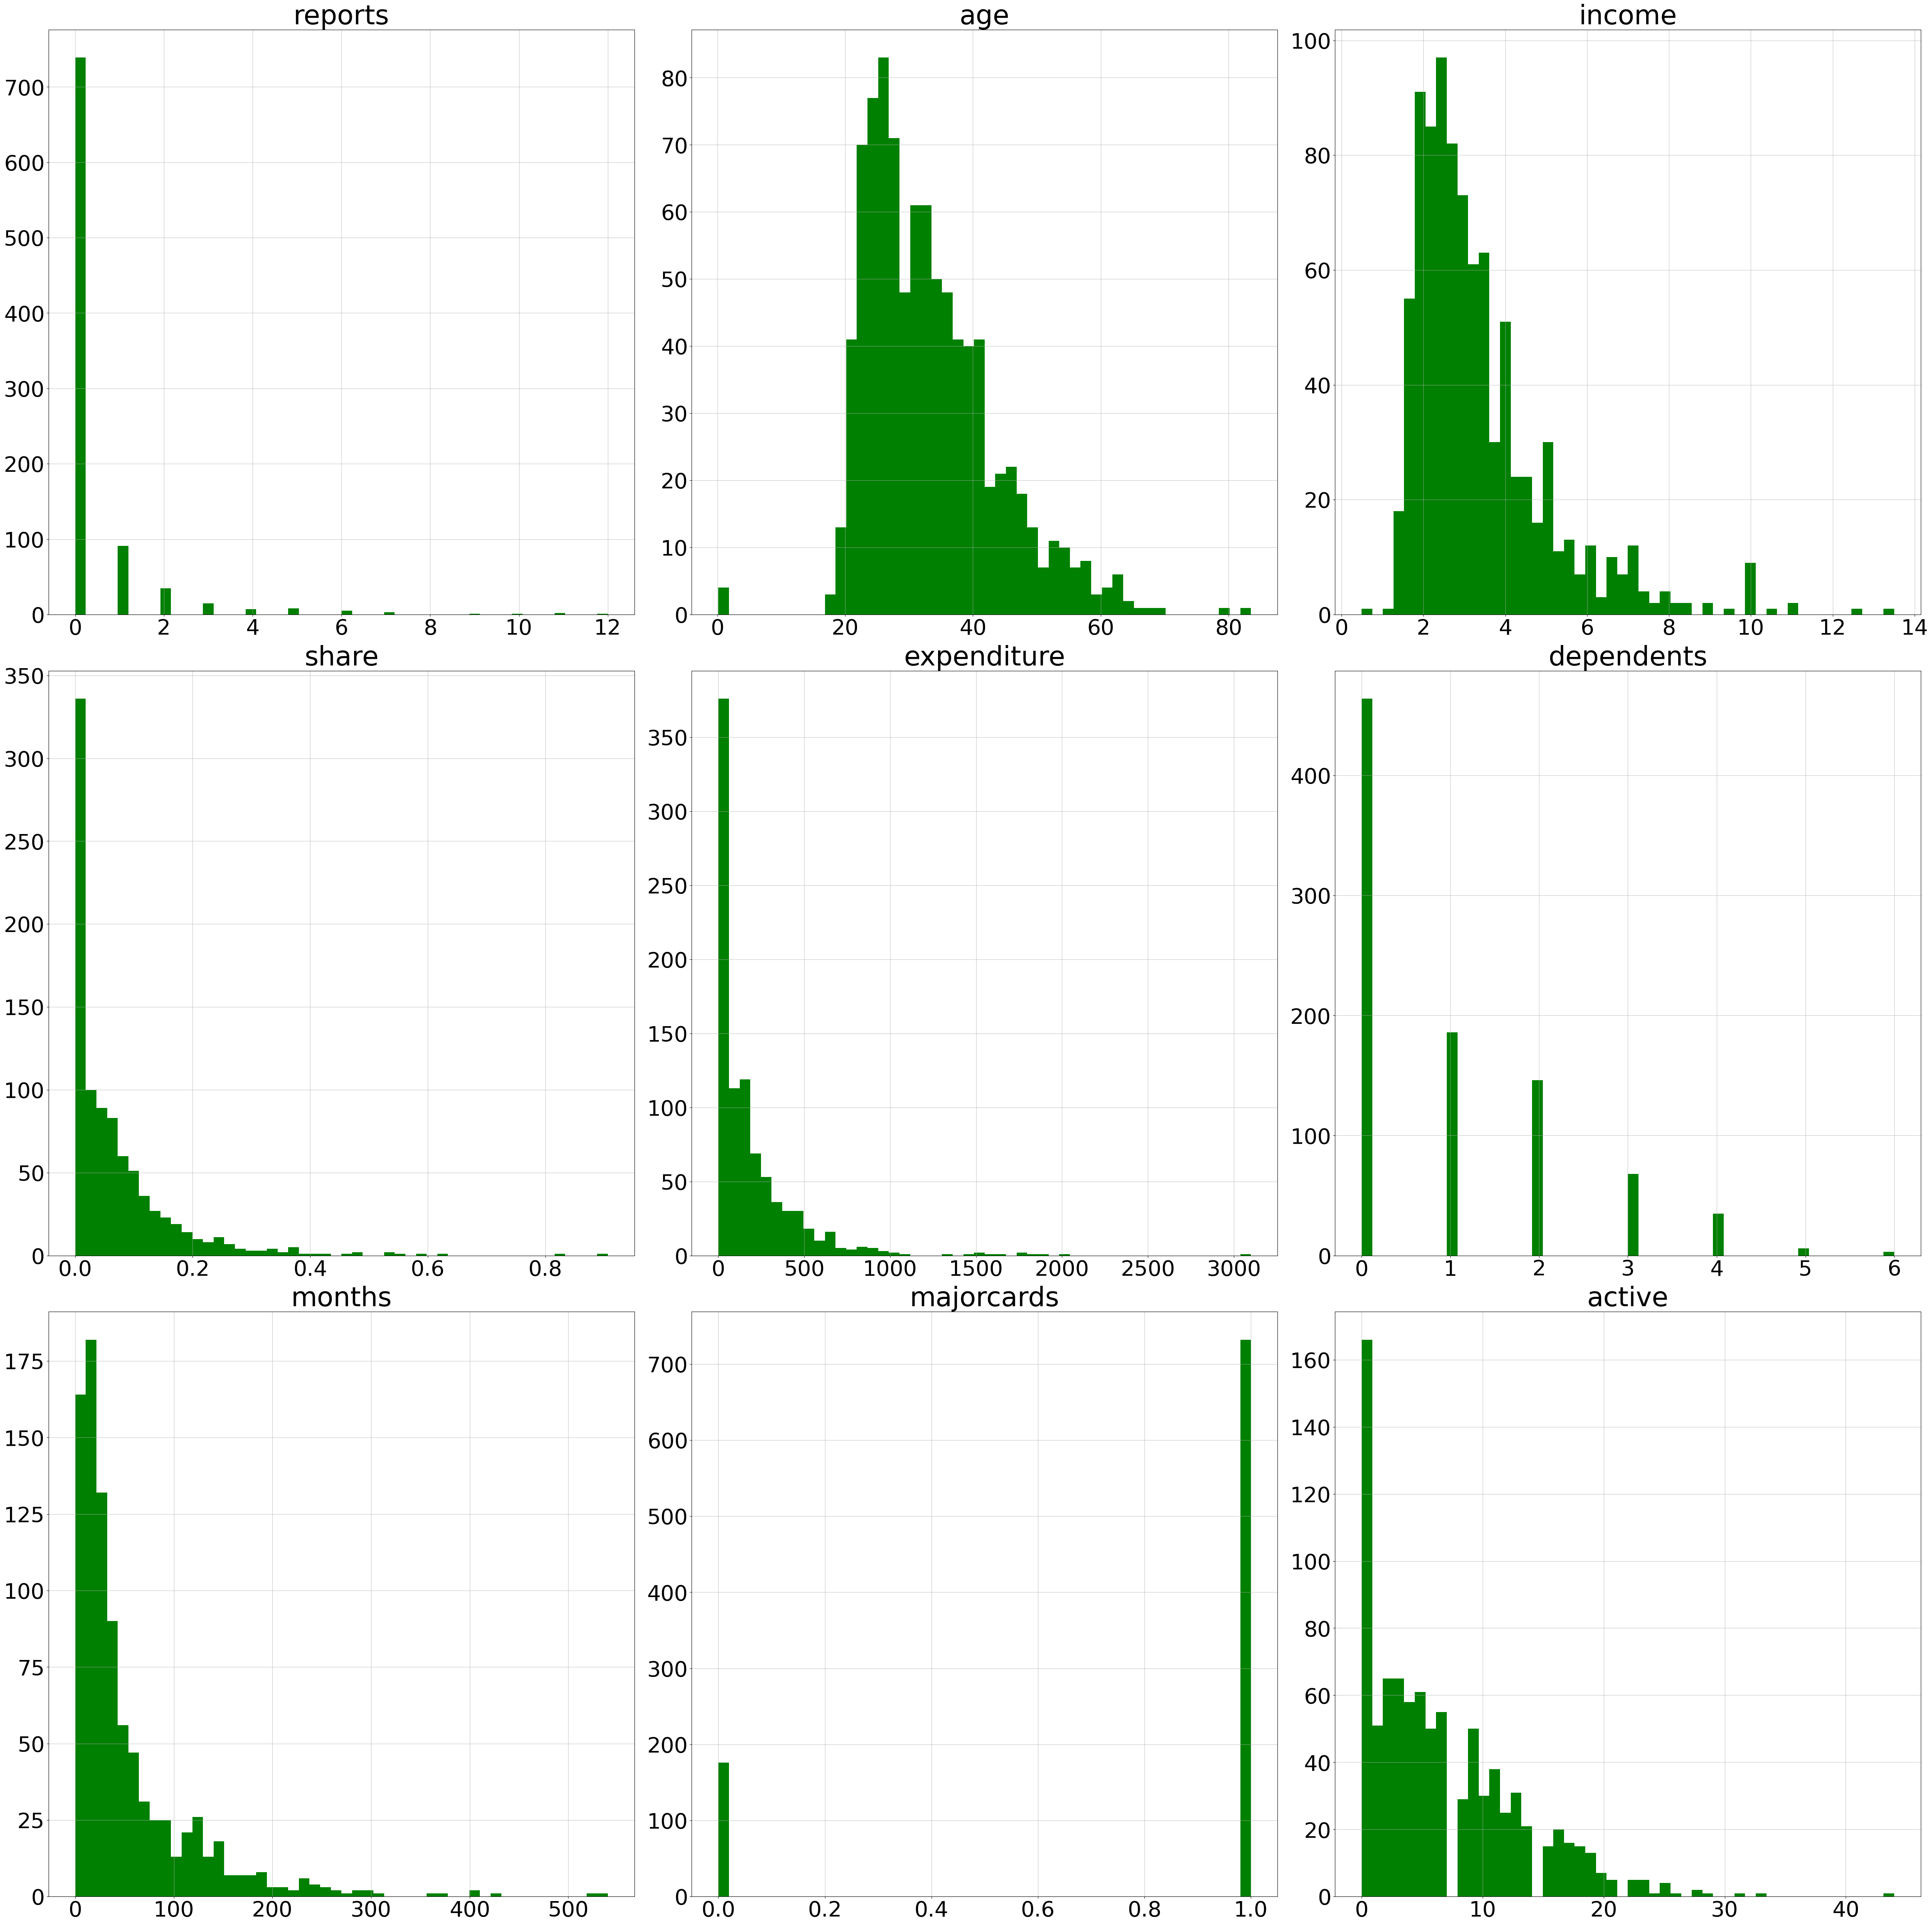

In [39]:
# Visualize the numerical data distribution
draw_histograms(EDA_df, numerical_columns, 3, 3, 50)

Next, I will analyze deeper into the numerical columns.

#### Detail EDA on each feature.

In [40]:
# Create the function for specific numerical column data visualization.
def check_dist(col, bins=50, density=False, plot_normal=True, log_bins=False):
  """A function to visualize the graph for inspecting each feature thoroughly,
  in addition to the basic bar plot of the feature, the graph also shows the normal distribution curve, mean and median vertical lines.
  The correlation to the dependent/target feature is visualized by the KDE plot."""

  x = EDA_df[col]
  TARGET = EDA_df['card']

  fig, ax = plt.subplots(figsize=(8,6))
  fig.suptitle(f"Distribution of {str(col).upper()}")
  sns.distplot(x, axlabel=x.name, color = "green")
  sns.kdeplot(EDA_df.loc[TARGET == "yes", col] , label = 'Approved')
  sns.kdeplot(EDA_df.loc[TARGET == "no", col] ,  label = 'Not Approved')
  line1 = plt.axvline(x.mean(), color="k", linestyle="--", label = "mean")
  line2 = plt.axvline(np.median(x), color="r", linestyle="--", label = "median")
  first_legend = plt.legend(handles=[line1,line2], loc=1)

  if plot_normal == True:
    mu, std = stats.norm.fit(x)
    xmin, xmax = plt.xlim()
    x_norm = np.linspace(xmin, xmax, 100)
    pdf = stats.norm.pdf(x_norm, mu, std)
    ax.plot(x_norm, pdf, 'k', linewidth=2, label=f"normal distribution\n(mu=mean, std:{std:.2f}")

  ax.legend()
  fig.show()
  print(x.describe())
  print("Median:", x.median())

##### reports

count    908.000000
mean       0.416300
std        1.248875
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       12.000000
Name: reports, dtype: float64
Median: 0.0


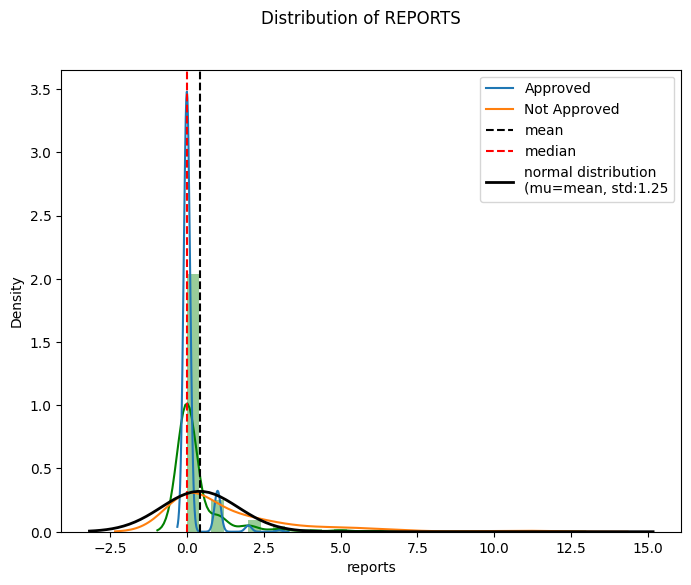

In [41]:
check_dist(numerical_columns[0])

Most applicants have no major derogatory reports.

##### ages

count    908.000000
mean      33.231736
std       10.237244
min        0.166667
25%       25.333330
50%       31.250000
75%       38.937503
max       83.500000
Name: age, dtype: float64
Median: 31.25


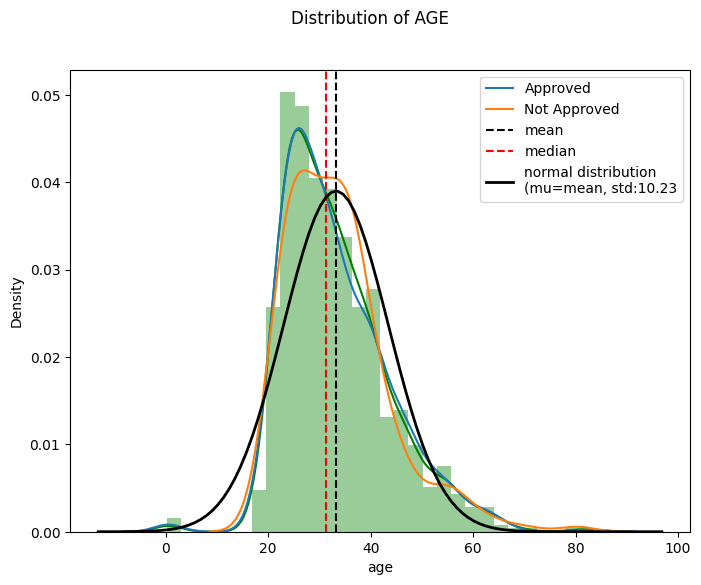

In [42]:
check_dist(numerical_columns[1])

I have a suspicion about the occurrence of applicants' age that is near 0 (zero) and the gap between 0 and 20.

To comprehend it, I need to find those data.

In [43]:
# Check the data of the applicants who are near zero in age 
EDA_df.loc[EDA_df['age'] < 1]

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,card
298,0,0.583333,4.00,0.072664,242.1283,yes,no,3,24,1,4,yes
551,0,0.166667,3.24,0.184366,497.7058,yes,no,3,25,1,16,yes
597,0,0.583333,2.50,0.083171,173.0233,no,no,0,150,1,5,yes
728,0,0.750000,1.60,0.154191,205.2542,no,no,0,1,1,9,yes


From the table shown above, I conclude that the applicants whose ages are near zero are irrelevant and thus can be excluded from the data and will be dropped later.

In [44]:
# Create a dataframe for the data to be dropped
EDA_df_drop = EDA_df.loc[EDA_df['age'] < 1]
joblib.dump(EDA_df_drop, pkl_folder + "EDA_df_drop.pkl")

['/root/ml_process/data/processed/EDA_df_drop.pkl']

##### income

count    908.000000
mean       3.383281
std        1.694995
min        0.490000
25%        2.250000
50%        3.000000
75%        4.000000
max       13.500000
Name: income, dtype: float64
Median: 3.0


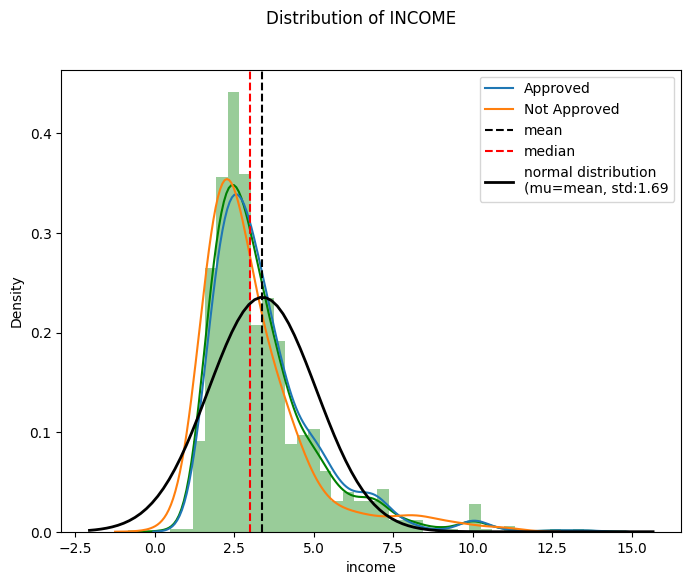

In [45]:
check_dist(numerical_columns[2])

The values shown in this feature are divided by 10,000.

There are some notable occurrence of applicants whose incomes are around 10, we need to inspect it further.

In [46]:
EDA_df.loc[(EDA_df['income'] >= 10)]


,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,card
11,0,45.58333,13.5000,0.010311,115.41670,yes,no,2,126,1,9,yes
127,0,51.58333,12.4999,0.297555,3099.50500,yes,no,1,120,1,21,yes
151,0,43.66667,10.0393,0.021863,182.82500,yes,no,1,12,1,18,yes
280,0,53.00000,11.0000,0.000109,0.00000,yes,yes,0,429,1,0,no
343,0,32.58333,10.0000,0.099808,831.73170,yes,no,3,7,1,28,yes
518,0,47.33333,10.4000,0.230948,2001.54700,yes,no,2,9,0,0,yes
535,1,32.50000,10.0000,0.037040,308.25000,yes,no,3,35,1,4,yes
802,0,31.75000,10.9999,0.010701,97.42416,no,no,0,12,1,0,yes
813,2,46.00000,10.0320,0.010134,84.39083,yes,no,2,134,1,15,yes


There are 8 out of 9 applicants whose incomes more than 10 are more likely to be approved, the only one applicant who is not approved have zero expenditure.

Thus I conclude this group as the outlier, will be dropped later.



In [47]:
# Update the dataframe for the data to be dropped
EDA_df_drop = EDA_df_drop.append(EDA_df.loc[(EDA_df['income'] >= 10)])
joblib.dump(EDA_df_drop, pkl_folder + "EDA_df_drop.pkl")

['/root/ml_process/data/processed/EDA_df_drop.pkl']

##### share

count    908.000000
mean       0.069351
std        0.095898
min        0.000109
25%        0.002443
50%        0.038775
75%        0.094165
max        0.906320
Name: share, dtype: float64
Median: 0.038775409999999996


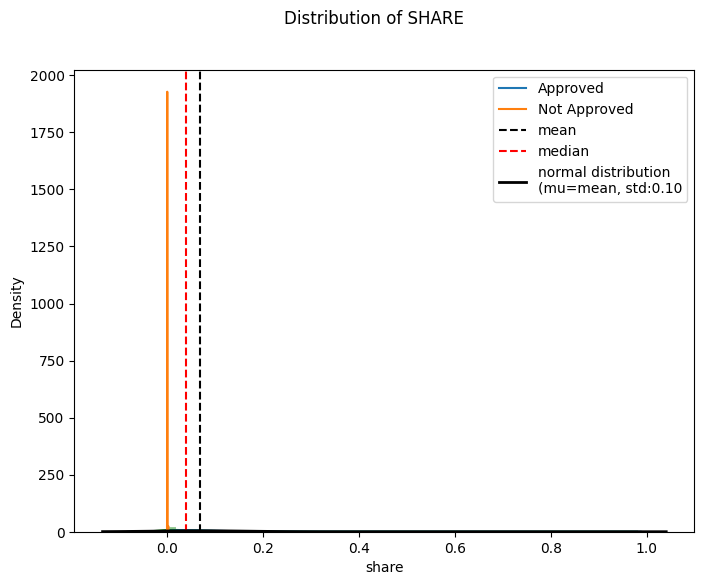

In [48]:
check_dist(numerical_columns[3])

Since I do not get a clear comprehension of the graph, I use the statistical data distribution information to inspect this feature.

Let's inspect the approval proportion from every quartile in this feature.

In [49]:
print(f"The approval proportion of Q4 data: \n{EDA_df.loc[(EDA_df['share'] >= 0.094165)].card.value_counts(normalize=True)}")
print("-------------------------------------\n")
print(f"The approval proportion of Q3 data: \n{EDA_df.loc[(EDA_df['share'] >= 0.387775) | (EDA_df['share'] <= 0.094165)].card.value_counts(normalize=True)}")
print("-------------------------------------\n")
print(f"The approval proportion of Q1 and Q2 data: \n{EDA_df.loc[(EDA_df['share'] <= 0.387775)].card.value_counts(normalize=True)}")
print("-------------------------------------\n")
print(f"The approval proportion of the entire training data: \n{EDA_df.card.value_counts(normalize=True)}")

The approval proportion of Q4 data: 
yes    1.0
Name: card, dtype: float64
-------------------------------------

The approval proportion of Q3 data: 
yes    0.706052
no     0.293948
Name: card, dtype: float64
-------------------------------------

The approval proportion of Q1 and Q2 data: 
yes    0.772067
no     0.227933
Name: card, dtype: float64
-------------------------------------

The approval proportion of the entire training data: 
yes    0.77533
no     0.22467
Name: card, dtype: float64


The applicants in the Q4 has 100% approval rate, while the proportion in the other quartiles are similar to the entire training data.

I decide to drop the Q4 data to get a more fair than biased training process.

In [50]:
# Update the dataframe for the data to be dropped
EDA_df_drop = EDA_df_drop.append(EDA_df.loc[(EDA_df['share'] >= 0.094165)])
joblib.dump(EDA_df_drop, pkl_folder + "EDA_df_drop.pkl")

['/root/ml_process/data/processed/EDA_df_drop.pkl']

##### expenditure

count     908.000000
mean      187.984463
std       277.174471
min         0.000000
25%         5.567708
50%       103.152500
75%       250.770800
max      3099.505000
Name: expenditure, dtype: float64
Median: 103.1525


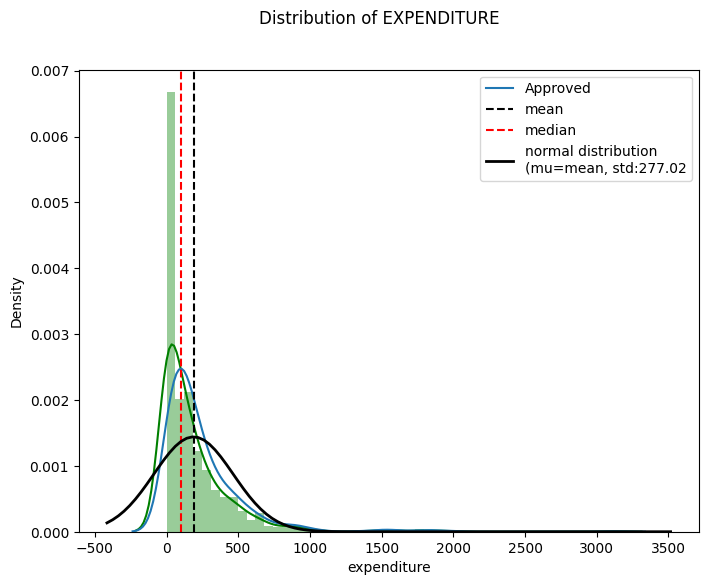

In [51]:
check_dist(numerical_columns[4])

Let's check the applicants with zero expenditure.

In [52]:
print(f"The approval proportion zero expenditure applicants: \n{EDA_df.loc[(EDA_df['expenditure'] == 0)].card.value_counts(normalize=True)}")

The approval proportion zero expenditure applicants: 
no     0.940092
yes    0.059908
Name: card, dtype: float64


Most of them are not approved to have the credit card.

Let's check the minority ones, the approved applicants.

In [53]:
EDA_df.loc[(EDA_df['expenditure'] == 0) & (EDA_df['card'] == 'yes')]

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,card
22,0,29.08333,2.2000,0.000545,0.0,no,no,0,9,1,0,yes
51,0,32.00000,2.4000,0.000500,0.0,no,no,1,11,1,8,yes
81,0,53.50000,1.5000,0.000800,0.0,yes,no,0,57,0,6,yes
126,0,19.83333,3.0000,0.000400,0.0,no,no,0,49,1,3,yes
157,0,23.00000,2.9000,0.000414,0.0,no,no,1,12,1,0,yes
301,0,29.00000,2.7000,0.000444,0.0,no,no,0,24,1,20,yes
321,0,23.75000,1.5678,0.000765,0.0,yes,no,1,6,1,0,yes
374,0,46.75000,2.8000,0.000429,0.0,yes,no,1,84,1,2,yes
505,0,44.66667,2.4000,0.000500,0.0,no,no,0,36,1,11,yes
525,0,49.16667,1.7000,0.000706,0.0,no,no,1,14,0,6,yes


From the table above, they are dominantly not self-employed and already held a credit card.

Perhaps the selfemp and majorcards features are decisive for the applicants with zero expenditure.

To prove it, let's observe the comparison between the approved and the not-approved ones.



In [54]:
print("Approved applicants\n")
print(f"Self-employed status: \n{EDA_df.loc[(EDA_df['expenditure'] == 0) & (EDA_df['card'] == 'yes')].selfemp.value_counts(normalize=True)}\n")
print(f"major credit cards ownership: \n{EDA_df.loc[(EDA_df['expenditure'] == 0) & (EDA_df['card'] == 'yes')].majorcards.value_counts(normalize=True)}")
print("_________________________________\n")
print("Not-Approved applicants\n")
print(f"Self-employed status: \n{EDA_df.loc[(EDA_df['expenditure'] == 0) & (EDA_df['card'] == 'no')].selfemp.value_counts(normalize=True)}\n")
print(f"major credit cards ownership: \n{EDA_df.loc[(EDA_df['expenditure'] == 0) & (EDA_df['card'] == 'no')].majorcards.value_counts(normalize=True)}")

Approved applicants

Self-employed status: 
no     0.923077
yes    0.076923
Name: selfemp, dtype: float64

major credit cards ownership: 
1    0.769231
0    0.230769
Name: majorcards, dtype: float64
_________________________________

Not-Approved applicants

Self-employed status: 
no     0.906863
yes    0.093137
Name: selfemp, dtype: float64

major credit cards ownership: 
1    0.715686
0    0.284314
Name: majorcards, dtype: float64


There is no significant difference, so the `selfemp` and `majorcards` features are not the major decisive detail.

I am determined to keep the zero expenditures data for the training process.

##### dependents

count    908.000000
mean       0.958150
std        1.227402
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        6.000000
Name: dependents, dtype: float64
Median: 0.0


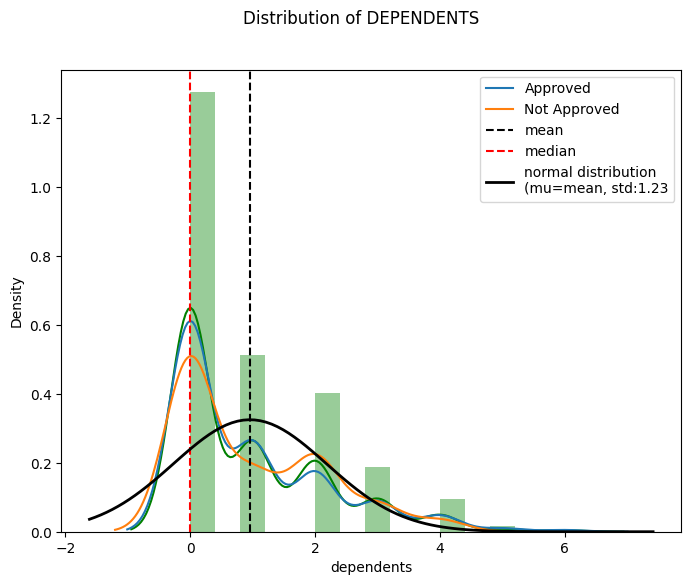

In [55]:
check_dist(numerical_columns[5])

Simply by reading the kdeplot of the approval decision, we can see that the probability of approved application is higher in every value of dependents, except in value 2.




##### months

count    908.000000
mean      53.778634
std       65.321278
min        0.000000
25%       12.000000
50%       30.000000
75%       70.500000
max      540.000000
Name: months, dtype: float64
Median: 30.0


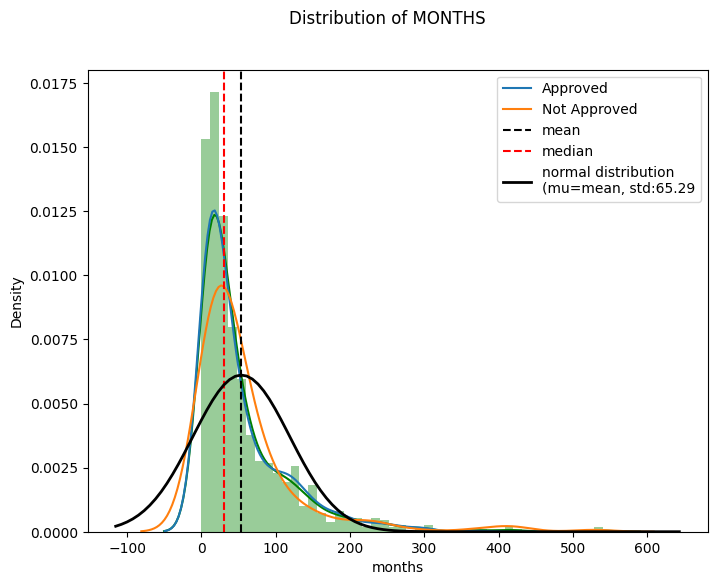

In [56]:
check_dist(numerical_columns[6])

This feature has a very wide range, let's inspect further the far distributed data to specify the outlier.

I roughly set the boundary at value 275.

In [57]:
EDA_df.loc[(EDA_df['months'] > 275)]

,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,card
68,0,69.75000,1.8000,0.000667,0.0000,yes,no,0,528,0,5,no
79,1,56.75000,8.0000,0.000150,0.0000,yes,no,0,408,1,7,no
280,0,53.00000,11.0000,0.000109,0.0000,yes,yes,0,429,1,0,no
313,1,55.33333,3.7000,0.052201,160.4517,yes,no,1,300,1,4,yes
331,1,53.66667,4.1800,0.000287,0.0000,no,no,1,288,1,2,no
333,0,49.16667,5.2000,0.146526,634.8625,yes,no,1,303,1,11,yes
393,2,34.83333,4.9000,0.000245,0.0000,no,no,2,408,1,3,no
469,0,47.41667,4.9200,0.044894,183.8983,yes,yes,1,288,1,14,yes
544,0,55.16667,6.7000,0.038585,214.9342,yes,no,1,300,1,13,yes
656,1,56.91667,3.4838,0.062895,182.0958,yes,no,0,540,1,7,yes


There are 12 applicants whose value is more than 275, with 6 of them were approved to have the credit card.

The approved applicants perfectly correlated with the `expenditure` instead of `months`, all applicants with zero expenditure are not approved to have the credit card.

I decide to keep them for the training process.

##### majorcards

count    908.000000
mean       0.806167
std        0.395517
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: majorcards, dtype: float64
Median: 1.0


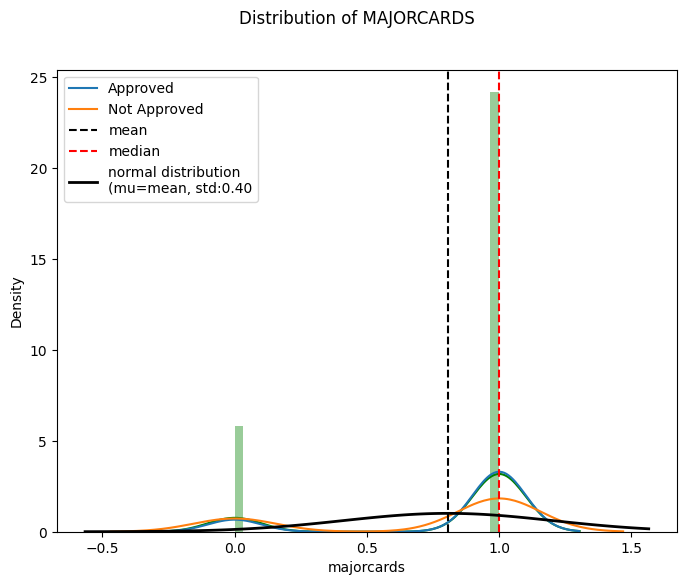

In [58]:
check_dist(numerical_columns[7])

Most applicants already have a credit card.

##### active

count    908.000000
mean       6.764317
std        6.269012
min        0.000000
25%        2.000000
50%        5.000000
75%       11.000000
max       44.000000
Name: active, dtype: float64
Median: 5.0


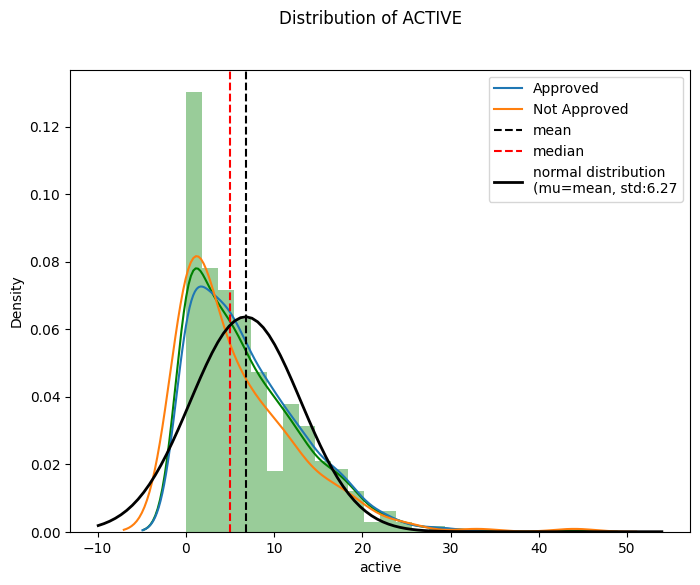

In [59]:
check_dist(numerical_columns[8])

Most applicants have no active credit accounts.

### Categorical Data Distribution.

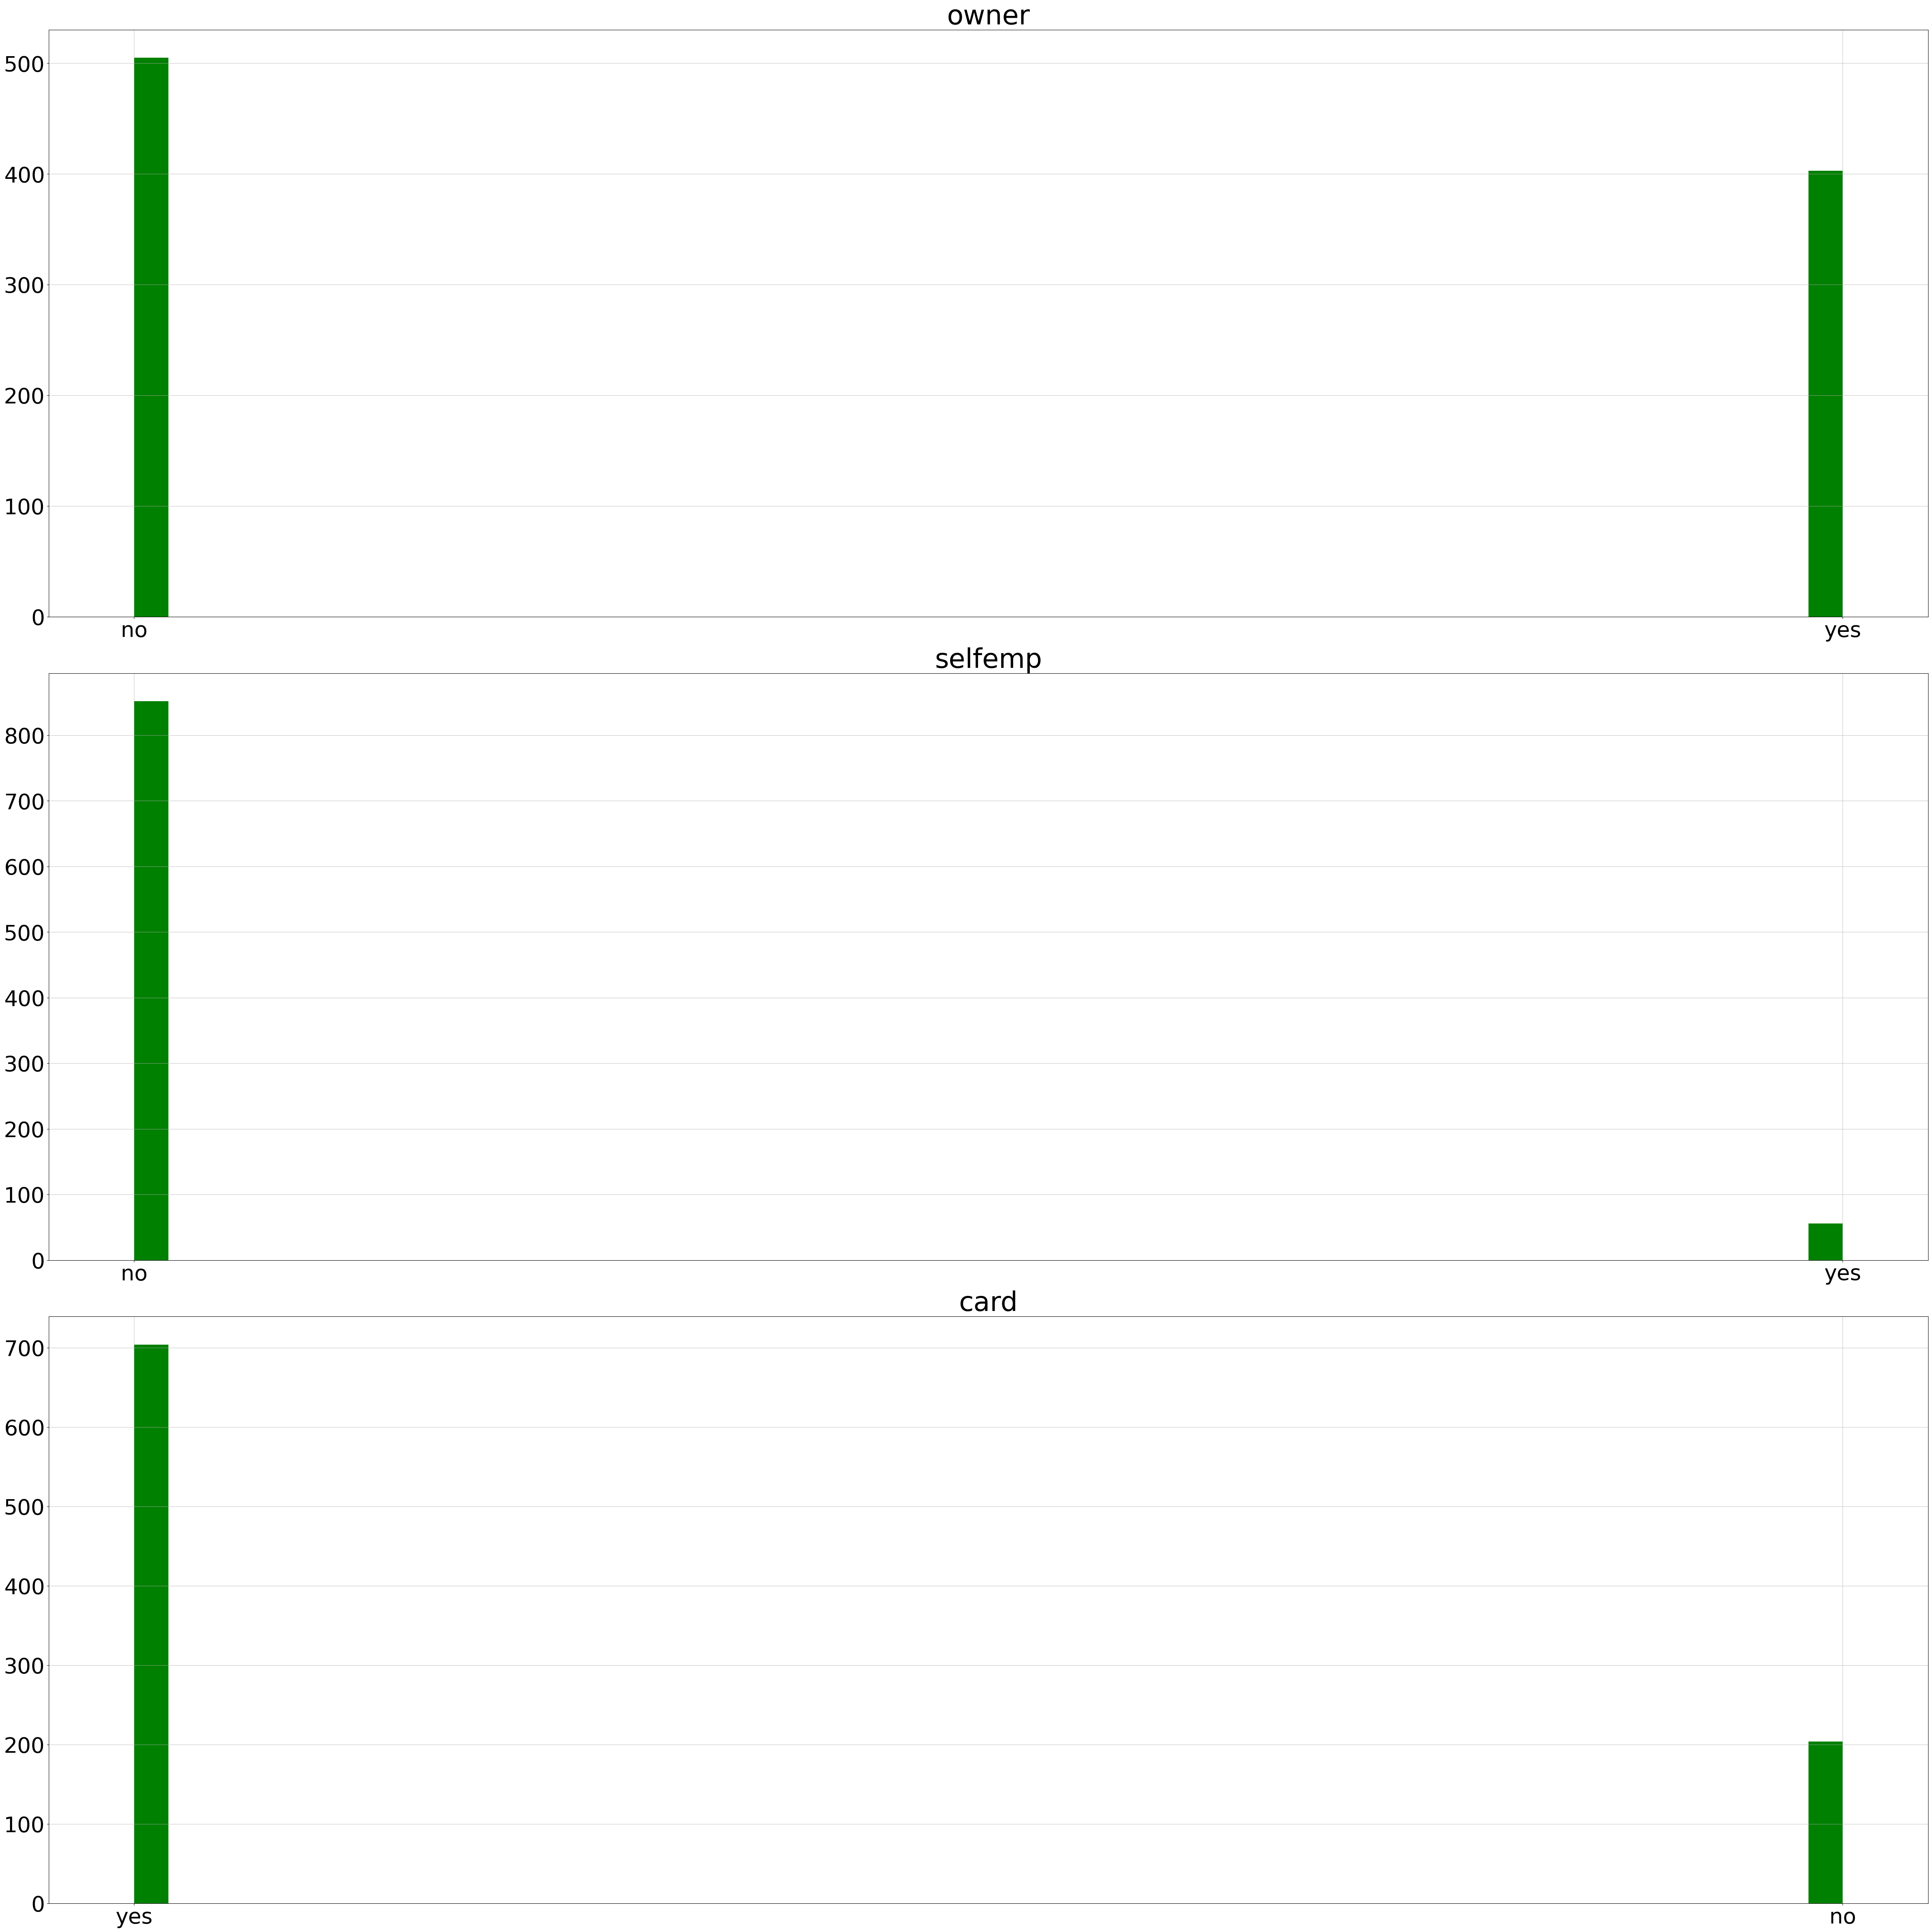

In [60]:
# Visualize the categorical data distribution
draw_histograms(EDA_df, categorical_columns, 3, 1, 50)

Next, I will analyze deeper into the categorical columns.

#### Detail EDA on each feature.

Since all categorical features are binary, so I will observe the correlation of each feature to the `card` feature.

##### owner vs card

In [74]:
CrosstabCount = pd.crosstab(index=EDA_df['owner'],\
                            columns=EDA_df['card'],\
                            margins = True, margins_name = "total")
print(f"Cross-tabulation of owner and card (count):\n \n{CrosstabCount}")
print("-------------------------------------\n")

CrosstabPerc = pd.crosstab(index=EDA_df['owner'],\
                           columns=EDA_df['card'],\
                           margins = True, margins_name = "total",\
                           normalize = True)*100
print(f"Cross-tabulation of owner and card (percentage):\n \n{CrosstabPerc}")
print("-------------------------------------\n")

CrosstabPerc = pd.crosstab(index=EDA_df['owner'],\
                           columns=EDA_df['card'],\
                           normalize = 'index')*100
print(f"Cross-tabulation of owner and card (relative percentage of owner):\n \n{CrosstabPerc}")

Cross-tabulation of owner and card (count):
 
card    no  yes  total
owner                 
no     143  362    505
yes     61  342    403
total  204  704    908
-------------------------------------

Cross-tabulation of owner and card (percentage):
 
card          no        yes      total
owner                                 
no     15.748899  39.867841   55.61674
yes     6.718062  37.665198   44.38326
total  22.466960  77.533040  100.00000
-------------------------------------

Cross-tabulation of owner and card (relative percentage of owner):
 
card          no        yes
owner                      
no     28.316832  71.683168
yes    15.136476  84.863524


The applicants whose not own a home are the majority, however the homeowners still have a higher probability to be approved.

##### selfemp vs card

In [73]:
CrosstabCount = pd.crosstab(index=EDA_df['selfemp'],\
                            columns=EDA_df['card'],\
                            margins = True, margins_name = "total")
print(f"Cross-tabulation of selfemp and card (count):\n \n{CrosstabCount}")
print("-------------------------------------\n")

CrosstabPerc = pd.crosstab(index=EDA_df['selfemp'],\
                           columns=EDA_df['card'],\
                           margins = True, margins_name = "total",\
                           normalize = True)*100
print(f"Cross-tabulation of selfemp and card (percentage):\n \n{CrosstabPerc}")
print("-------------------------------------\n")

CrosstabPerc = pd.crosstab(index=EDA_df['selfemp'],\
                           columns=EDA_df['card'],\
                           normalize = 'index')*100
print(f"Cross-tabulation of selfemp and card (relative percentage of selfemp):\n \n{CrosstabPerc}")

Cross-tabulation of selfemp and card (count):
 
card      no  yes  total
selfemp                 
no       185  667    852
yes       19   37     56
total    204  704    908
-------------------------------------

Cross-tabulation of selfemp and card (percentage):
 
card            no       yes       total
selfemp                                 
no       20.374449  73.45815   93.832599
yes       2.092511   4.07489    6.167401
total    22.466960  77.53304  100.000000
-------------------------------------

Cross-tabulation of selfemp and card (relative percentage of selfemp):
 
card            no        yes
selfemp                      
no       21.713615  78.286385
yes      33.928571  66.071429


The self-employed applicants are the significant minority, and their probability to be approved is not pretty high, this feature has a low correlation to the credit card approval decision.